In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import matplotlib
# matplotlib.use("TkAgg")
%matplotlib inline
import matplotlib.pyplot as plt

## 2D dataset

In [3]:
num_points = 100
X1 = np.linspace(-2.5, 1.9, num_points)
# X1 = np.linspace(-2.5, 2.5, num_points)
# X2 = np.linspace(-2.5, 3, num_points)
X2 = np.linspace(-2.2, 2.1, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1. - 0.1*(X1)+0.02*(X2)

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1
Y = Y/2

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = torch.Tensor(np.c_[x1, x2])
yy = torch.Tensor(Y.reshape(-1,1))


/tmp/ipykernel_1685723/3201775701.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


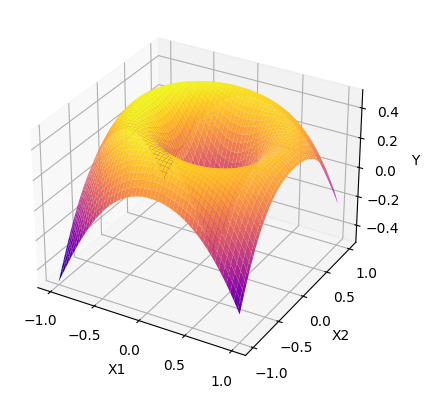

In [4]:
# %matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [5]:
from convex_lib import ConvexNN

In [6]:
EPOCHS = 3000
# actf = nn.LeakyReLU
actf = nn.ELU
learning_rate = 0.005
criterion = nn.MSELoss()

# Convex NN

In [7]:
cvxNet = ConvexNN([2, 10, 10, 1], actf)
optimizer = torch.optim.Adam(cvxNet.parameters(), lr=learning_rate)

Epoch: 0, Loss:0.20980244874954224


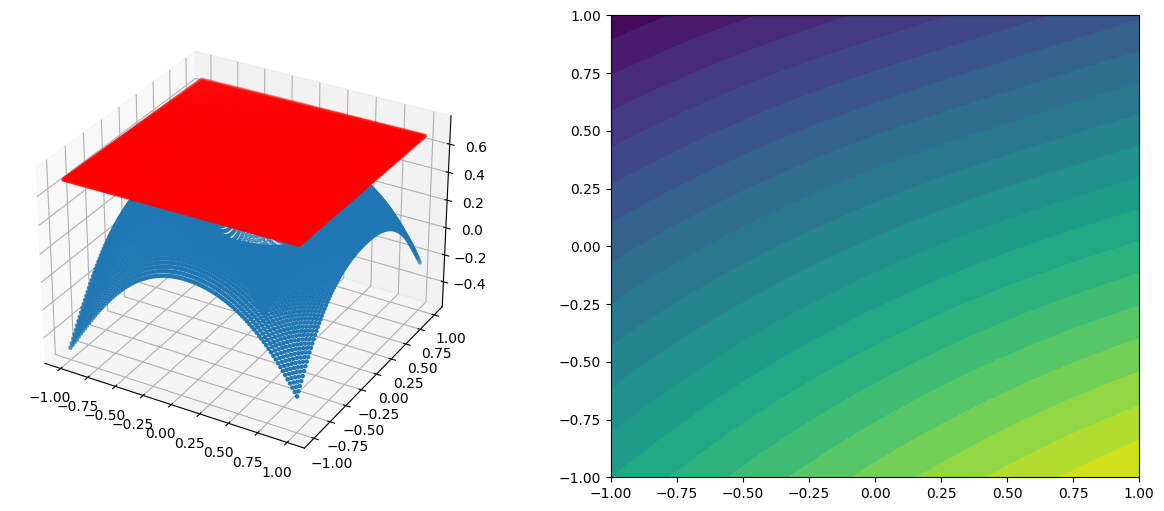

Epoch: 100, Loss:0.031301163136959076
Epoch: 200, Loss:0.028076091781258583
Epoch: 300, Loss:0.02476404793560505
Epoch: 400, Loss:0.022341180592775345
Epoch: 500, Loss:0.021020542830228806
Epoch: 600, Loss:0.020249269902706146
Epoch: 700, Loss:0.01984364353120327
Epoch: 800, Loss:0.019467409700155258
Epoch: 900, Loss:0.019246820360422134
Epoch: 1000, Loss:0.019060594961047173
Epoch: 1100, Loss:0.018901733681559563
Epoch: 1200, Loss:0.01875315234065056
Epoch: 1300, Loss:0.018636083230376244
Epoch: 1400, Loss:0.018525641411542892
Epoch: 1500, Loss:0.018428467214107513
Epoch: 1600, Loss:0.018349580466747284
Epoch: 1700, Loss:0.018279332667589188
Epoch: 1800, Loss:0.018340731039643288
Epoch: 1900, Loss:0.018158860504627228
Epoch: 2000, Loss:0.01810510829091072
Epoch: 2100, Loss:0.018094690516591072
Epoch: 2200, Loss:0.01801772229373455
Epoch: 2300, Loss:0.017977114766836166
Epoch: 2400, Loss:0.018051525577902794
Epoch: 2500, Loss:0.017912624403834343
Epoch: 2600, Loss:0.017883092164993286


In [8]:
%matplotlib inline
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

for epoch in range(EPOCHS):

    yout = -cvxNet(xx)    
    loss = criterion(yout, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch%100 == 0 or epoch==EPOCHS-1:
        print(f'Epoch: {epoch}, Loss:{float(loss)}')
        ax.clear()
        ax.scatter(X1, X2, yy.data.numpy().reshape(-1), marker= '.')
        ax.scatter(X1, X2, yout.data.numpy().reshape(-1), color='r', marker='.')
        ax2.clear()
        ax2.contourf(X1, X2, yout.data.numpy().reshape(Y.shape), levels=20)

        fig.canvas.draw()
        plt.pause(0.01)
plt.close()

/tmp/ipykernel_1685723/1236598628.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


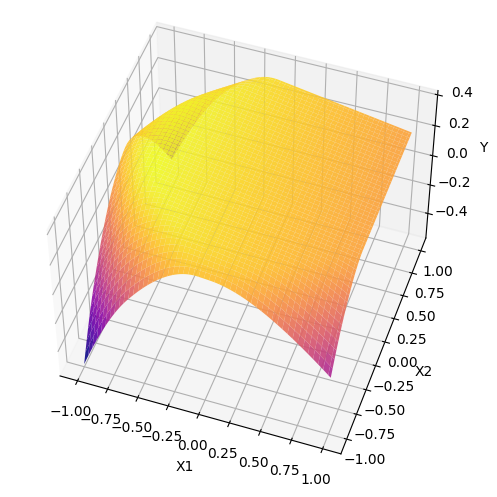

In [9]:
%matplotlib inline

y_ = yout.data.cpu().numpy().reshape(Y.shape)

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.view_init(49, -71)
ax.plot_surface(X1, X2, y_, cmap='plasma', alpha=0.9)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
# plt.pause(0.1)
plt.show()

In [10]:
cvxNet.eval()

ConvexNN(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
  (skip_layers): ModuleList(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=2, out_features=1, bias=True)
  )
)

## Plotting Contour Plot

In [11]:
! mkdir outputs/04.0_convex_distance/

mkdir: cannot create directory ‘outputs/04.0_convex_distance/’: File exists


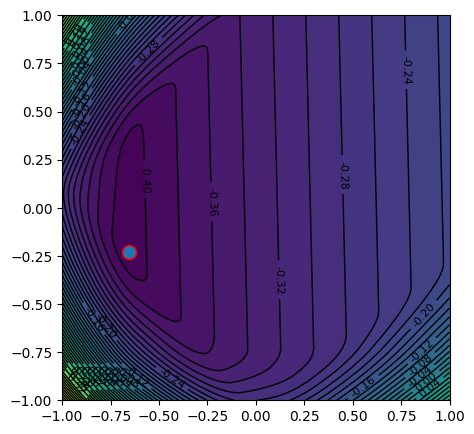

In [12]:
# LVLs = np.linspace(sim.min(), sim.max(), 20)
LVLs = 50

y_ = cvxNet(xx).data.cpu().numpy().reshape(Y.shape)

plt.figure(figsize=(5,5))
plt.contourf(X1, X2, y_, levels=LVLs)
cs = plt.contour(X1, X2, y_, levels=LVLs, linestyles="None", colors="k", linewidths=1)
plt.clabel(cs, cs.levels[1::2], inline=True, fontsize=8, fmt="%1.2f")
minima = xx[y_.argmin()]
plt.scatter(*minima.tolist(), s=100, edgecolors="red")

# plt.tick_params(left = False, right = False , labelleft = False ,
#                 labelbottom = False, bottom = False)
# plt.savefig("./outputs/04.0_convex_distance/convex_contour_dist.pdf", bbox_inches='tight')

In [13]:
min_val = y_.min()
min_val

-0.40855125

In [14]:
minima = xx[None, y_.argmin()]
minima

tensor([[-0.6566, -0.2323]])

In [15]:
# minima[0, 0] = minima[0, 0] + 0.25
# minima[0, 1] = minima[0, 1] - 0.1

## Finding Mimima by using gradient descent

In [16]:
# xmin = torch.randn_like(minima)
xmin = minima.clone()
xmin = torch.autograd.Variable(xmin, requires_grad=True)
xmin

tensor([[-0.6566, -0.2323]], requires_grad=True)

In [17]:
optim = torch.optim.Adam([xmin], lr=0.001)
STEPS = 4000
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optim, T_max=STEPS)

### Training Loop

In [18]:
for step in range(STEPS):
    optimizer.zero_grad() 

    ymin = cvxNet(xmin)
    xgrad = torch.autograd.grad(outputs=ymin, inputs=xmin, grad_outputs=torch.ones_like(ymin), 
                            only_inputs=True, retain_graph=True, create_graph=True)[0]
    xmin.grad = xgrad
    
    optim.step()
    scheduler.step()
    
    if step%100 == 0:
        print(f"STEPS: {step}, xmin: {xmin.data}, min_value: {ymin.data}")

STEPS: 0, xmin: tensor([[-0.6576, -0.2333]]), min_value: tensor([[-0.4086]])
STEPS: 100, xmin: tensor([[-0.6588, -0.2306]]), min_value: tensor([[-0.4086]])
STEPS: 200, xmin: tensor([[-0.6588, -0.2306]]), min_value: tensor([[-0.4086]])
STEPS: 300, xmin: tensor([[-0.6588, -0.2306]]), min_value: tensor([[-0.4086]])
STEPS: 400, xmin: tensor([[-0.6588, -0.2306]]), min_value: tensor([[-0.4086]])
STEPS: 500, xmin: tensor([[-0.6588, -0.2306]]), min_value: tensor([[-0.4086]])
STEPS: 600, xmin: tensor([[-0.6588, -0.2306]]), min_value: tensor([[-0.4086]])
STEPS: 700, xmin: tensor([[-0.6588, -0.2306]]), min_value: tensor([[-0.4086]])
STEPS: 800, xmin: tensor([[-0.6588, -0.2306]]), min_value: tensor([[-0.4086]])
STEPS: 900, xmin: tensor([[-0.6588, -0.2306]]), min_value: tensor([[-0.4086]])
STEPS: 1000, xmin: tensor([[-0.6588, -0.2306]]), min_value: tensor([[-0.4086]])
STEPS: 1100, xmin: tensor([[-0.6588, -0.2306]]), min_value: tensor([[-0.4086]])
STEPS: 1200, xmin: tensor([[-0.6588, -0.2306]]), min

In [19]:
minima = xmin.data
minima_backup = minima
minval_backup = min_val

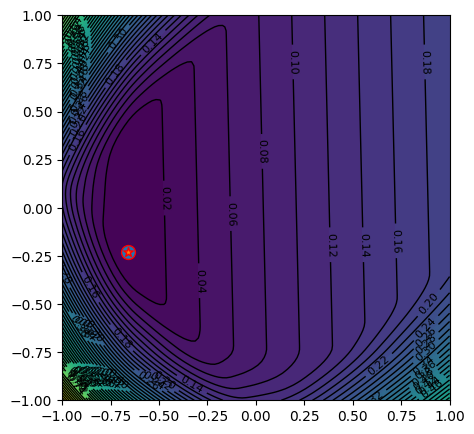

In [20]:
# LVLs = np.linspace(sim.min(), sim.max(), 20)
LVLs = 50

y_ = cvxNet(xx).data.cpu().numpy().reshape(Y.shape) - min_val

plt.figure(figsize=(5,5))
plt.contourf(X1, X2, y_, levels=LVLs)
cs = plt.contour(X1, X2, y_, levels=LVLs, linestyles="None", colors="k", linewidths=1)
plt.clabel(cs, cs.levels, inline=True, fontsize=8, fmt="%1.2f")
plt.scatter(*minima[0].tolist(), s=100, edgecolors="red")
plt.scatter(*xmin.data[0].tolist(), s=50, edgecolors="red", marker="*")

# plt.tick_params(left = False, right = False , labelleft = False ,
#                 labelbottom = False, bottom = False)
# plt.savefig("./outputs/04.0_convex_distance/convex_contour_dist.pdf", bbox_inches='tight')

In [21]:
# minima = xmin.data
# min_val = ymin.data[0].item()
# minima, min_val

## Using Learned function for Distance

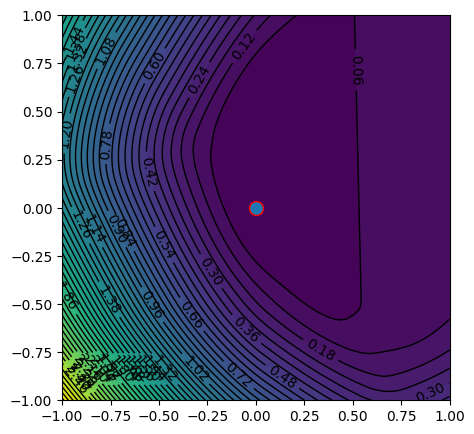

In [22]:
xx_ = xx + minima
y_ = cvxNet(xx_).data.cpu().numpy().reshape(Y.shape)- min_val
# y_ = y_**0.5

LVLs = 50
plt.figure(figsize=(5,5))
plt.contourf(X1, X2, y_, levels=LVLs)
cs = plt.contour(X1, X2, y_, levels=LVLs, linestyles="None", colors="k", linewidths=1)
plt.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.2f")
plt.scatter(0, 0, s=100, edgecolors="red")

## Contour as Distance

In [23]:
def get_contour_distance(level=1.0):
    xx_ =  xx
    x_norm = torch.norm(xx_, dim=1, keepdim=True)
    xx_= xx_/x_norm*level
    y_ = cvxNet(xx_+ minima) - min_val
    y_ = y_*x_norm/level
#     y_ = 1/y_*x_norm/level ### This also works but takes inverse distance

    return y_

<a list of 47 text.Text objects>

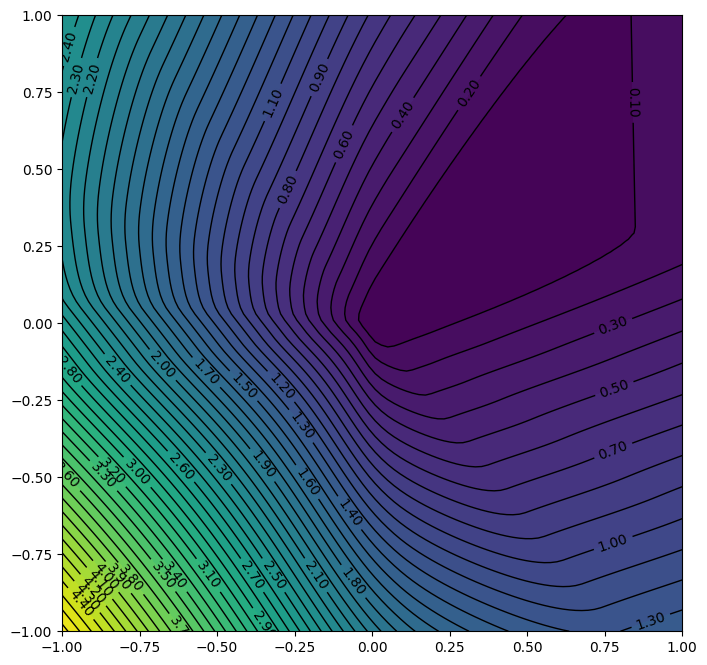

In [24]:
y_ = get_contour_distance(3.5).data.cpu().numpy().reshape(Y.shape)#**0.5

LVLs = 50
plt.figure(figsize=(8,8))
plt.contourf(X1, X2, y_, levels=LVLs)
cs = plt.contour(X1, X2, y_, levels=LVLs, linestyles="None", colors="k", linewidths=1)
plt.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.2f")
# plt.scatter(0, 0, s=100, edgecolors="red")

In [25]:
y_.min()

0.0012045826

In [26]:
'''
Observation: -> for some noisy minima found...
1) The function seems like a convex contour of different shape. (not always convex - sometimes 1-invex)
2) The magnitude of slope of the function in different direction seems different.
        (Having same slope in all direction would mean a good distance like Lp-norms)
'''

'\nObservation: -> for some noisy minima found...\n1) The function seems like a convex contour of different shape. (not always convex - sometimes 1-invex)\n2) The magnitude of slope of the function in different direction seems different.\n        (Having same slope in all direction would mean a good distance like Lp-norms)\n'

In [27]:
def get_contour_distance_lp(level=1.0, p=1):
    xx_ =  xx
    x_norm = torch.norm(xx_, dim=1, keepdim=True)
    xx_= xx_/x_norm*level
    y_ = torch.norm(xx_, p=p, dim=1, keepdim=True)
    y_ = y_*x_norm#/level
    return y_

<a list of 112 text.Text objects>

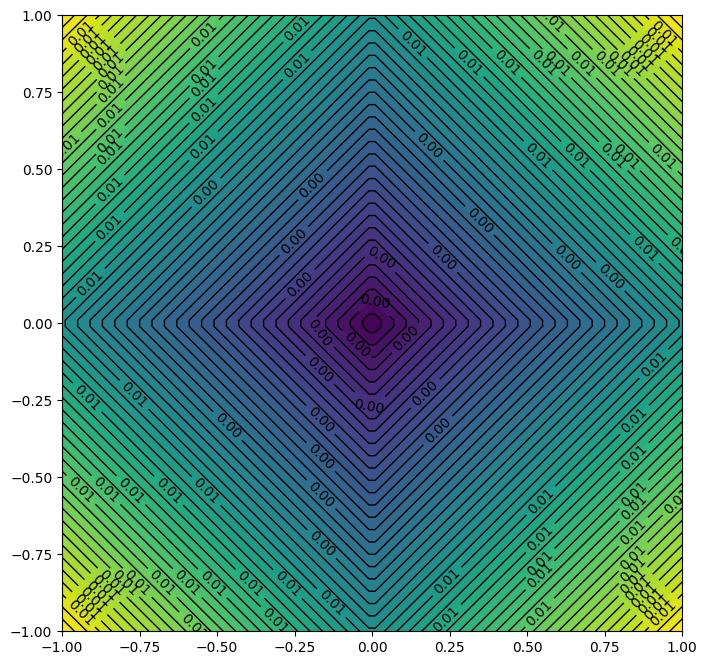

In [28]:
y_ = get_contour_distance_lp(0.005, p=1).data.cpu().numpy().reshape(Y.shape)

LVLs = 50
plt.figure(figsize=(8,8))
plt.contourf(X1, X2, y_, levels=LVLs)
cs = plt.contour(X1, X2, y_, levels=LVLs, linestyles="None", colors="k", linewidths=1)
plt.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.2f")
# plt.scatter(0, 0, s=100, edgecolors="red")

In [29]:
def get_contour_distance_v2(level=1.0):
    xx_ =  xx
    x_norm = torch.norm(xx_, dim=1, keepdim=True)
#     xx_= xx_/x_norm*level
    y_ = cvxNet(xx_+ minima) - min_val
#     y_ = y_*x_norm/level

    xx_2= xx*y_/x_norm
#     y_2 = cvxNet(xx_2+ minima) - min_val

    y_2 = torch.norm(xx_2, p=2, dim=1, keepdim=True)
    
    
    return y_2

In [30]:
def get_contour_distance_v3(level=1.0):
    xx_ =  xx
    x_norm = torch.norm(xx_, dim=1, keepdim=True)
    xx_= xx_/x_norm*level
    y_ = cvxNet(xx+ minima) - min_val
    y_ = y_*x_norm/level
    return y_

<a list of 54 text.Text objects>

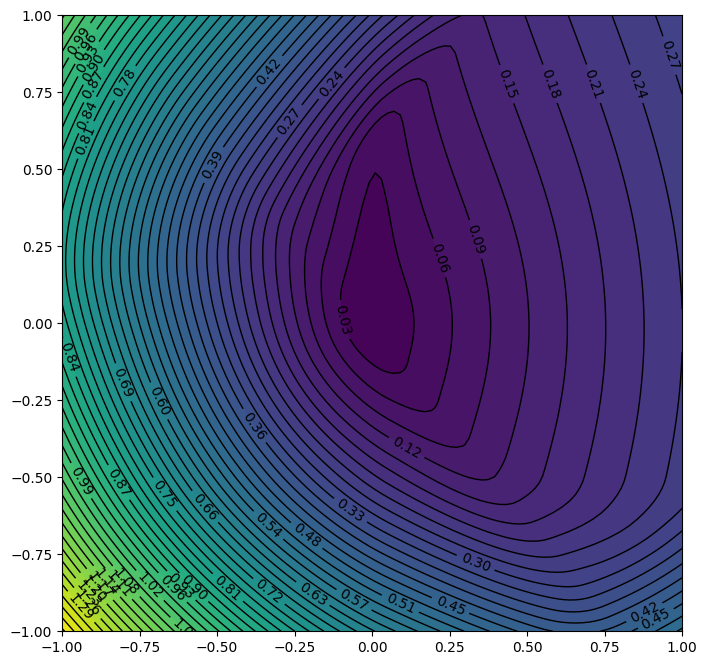

In [31]:
y_ = get_contour_distance_v3(2).data.cpu().numpy().reshape(Y.shape)**0.5

LVLs = 50
plt.figure(figsize=(8,8))
plt.contourf(X1, X2, y_, levels=LVLs)
cs = plt.contour(X1, X2, y_, levels=LVLs, linestyles="None", colors="k", linewidths=1)
plt.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.2f")
# plt.scatter(0, 0, s=100, edgecolors="red")

In [32]:
xx[y_.argmin()]

tensor([-0.0101,  0.0101])

In [33]:
# asdasd

### Extracting the Exact Contour 

In [34]:
"""
PROBLEM:
A. The contours generated by using convex function as a distance can produce non-convex contours.
B. Extracting the exact contours given a function is difficult (not made in such a way)


SOLUTION
Getting distance to a specific contour (a) in a given direction from the center. 
1. Make mimima at given (a) and optimize xx only in the magnitude. The final xx is the contour.
    a) initialize xx to unit-norm(or a) so that slight misplace in minima does not alter contour to (a)
2. distance = ||initial xx||  /  ||final xx||

BETTER -> get the exact 
"""

'\nPROBLEM:\nA. The contours generated by using convex function as a distance can produce non-convex contours.\nB. Extracting the exact contours given a function is difficult (not made in such a way)\n\n\nSOLUTION\nGetting distance to a specific contour (a) in a given direction from the center. \n1. Make mimima at given (a) and optimize xx only in the magnitude. The final xx is the contour.\n    a) initialize xx to unit-norm(or a) so that slight misplace in minima does not alter contour to (a)\n2. distance = ||initial xx||  /  ||final xx||\n\nBETTER -> get the exact \n'

In [35]:
contour_levels = []

In [36]:
cvxNet.eval()

ConvexNN(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
  (skip_layers): ModuleList(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=2, out_features=1, bias=True)
  )
)

In [37]:
xx.shape

torch.Size([10000, 2])

In [59]:
level = 0.10 #0.05
xx_norm = torch.norm(xx, dim=1, keepdim=True)
xx_ = xx/xx_norm * level

In [60]:
xx_lnorm = torch.ones_like(xx_norm)*2#0.5
xx_lnorm = torch.autograd.Variable(xx_lnorm, requires_grad=True)
xx_lnorm

tensor([[2.],
        [2.],
        [2.],
        ...,
        [2.],
        [2.],
        [2.]], requires_grad=True)

In [61]:
# # y_ = (xx_norm/xx_lnorm.data).cpu().reshape(X1.shape)
# yy_ = cvxNet(xx_*xx_lnorm + minima) - min_val - level
# # yy_ = torch.abs(yy_)
# y_= yy_.data.numpy().reshape(Y.shape)

# LVLs = 20
# plt.figure(figsize=(6,6))
# plt.contourf(X1, X2, y_, levels=LVLs)
# cs = plt.contour(X1, X2, y_, levels=LVLs, linestyles="None", colors="k", linewidths=1)
# plt.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.2f")

In [62]:
optimizer = torch.optim.Adam([xx_lnorm], lr=0.03)
STEPS = 4000
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=STEPS)

In [63]:
# minima -= 0.01

### Training Loop

In [64]:
for step in range(STEPS):
    optimizer.zero_grad() 

    yy_ = torch.abs(cvxNet(xx_*xx_lnorm + minima) - min_val - level)
    xgrad = torch.autograd.grad(outputs=yy_, inputs=xx_lnorm, grad_outputs=torch.ones_like(yy_), 
                            only_inputs=True, retain_graph=True, create_graph=True)[0]
    xx_lnorm.grad = xgrad
    
    optimizer.step()
    scheduler.step()    
    
    if step%100 == 0:
        print(f"STEPS: {step}, norm_min: {xx_lnorm.data.min()}, norm_max: {xx_lnorm.data.max()}, min_value: {ymin.data.min()}")

STEPS: 0, norm_min: 2.0299994945526123, norm_max: 2.0299999713897705, min_value: -0.40855854749679565
STEPS: 100, norm_min: 2.002385377883911, norm_max: 5.894372463226318, min_value: -0.40855854749679565
STEPS: 200, norm_min: 2.0032782554626465, norm_max: 10.569214820861816, min_value: -0.40855854749679565
STEPS: 300, norm_min: 2.000518798828125, norm_max: 13.100857734680176, min_value: -0.40855854749679565
STEPS: 400, norm_min: 2.005035161972046, norm_max: 15.565292358398438, min_value: -0.40855854749679565
STEPS: 500, norm_min: 1.9982975721359253, norm_max: 17.396465301513672, min_value: -0.40855854749679565
STEPS: 600, norm_min: 2.0002994537353516, norm_max: 17.507261276245117, min_value: -0.40855854749679565
STEPS: 700, norm_min: 2.0030202865600586, norm_max: 17.51061248779297, min_value: -0.40855854749679565
STEPS: 800, norm_min: 2.0037927627563477, norm_max: 17.507259368896484, min_value: -0.40855854749679565
STEPS: 900, norm_min: 2.00297474861145, norm_max: 17.505102157592773, m

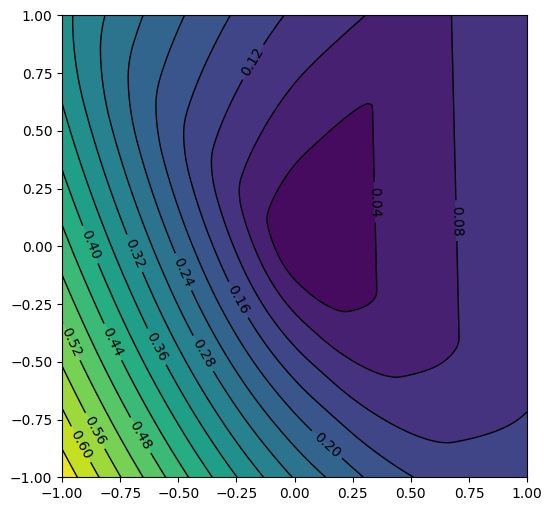

In [65]:
y_ = (xx_norm/xx_lnorm.data).cpu().reshape(X1.shape)

LVLs = 20
plt.figure(figsize=(6,6))
plt.contourf(X1, X2, y_, levels=LVLs)
cs = plt.contour(X1, X2, y_, levels=LVLs, linestyles="None", colors="k", linewidths=1)
plt.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.2f")

# plt.tick_params(left = False, right = False , labelleft = False ,
#                 labelbottom = False, bottom = False)
plt.savefig(f"./outputs/04.0_convex_distance/convex_contour_dist_l{level}.pdf", bbox_inches='tight')

In [66]:
y_.shape

torch.Size([100, 100])

In [67]:
contour_levels += [level]
contour_levels = list(set(contour_levels))

## Convex Function for refrence

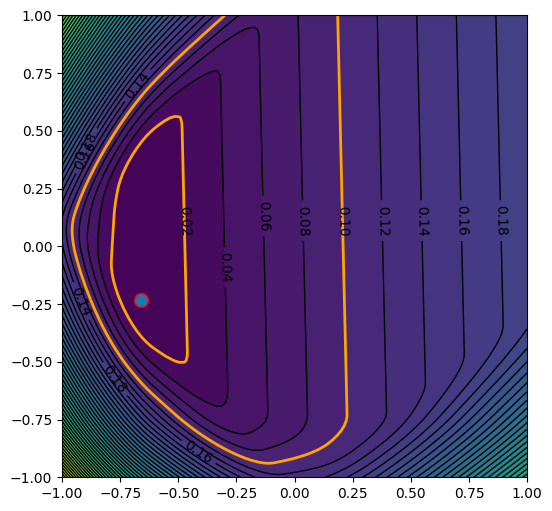

In [72]:
# y_ = cvxNet(xx + minima).data.cpu().numpy().reshape(Y.shape)- min_val
y_ = cvxNet(xx).data.cpu().numpy().reshape(Y.shape) - min_val

LVLs = 50
plt.figure(figsize=(6,6))
plt.contourf(X1, X2, y_, levels=LVLs)
cs = plt.contour(X1, X2, y_, levels=LVLs, linestyles="None", colors="k", linewidths=1)
plt.clabel(cs, cs.levels[:10], inline=True, fontsize=10, fmt="%1.2f")
plt.contour(X1, X2, y_, levels=contour_levels, linestyles="None", colors="orange", linewidths=2)
plt.scatter(*minima[0].tolist(), s=100, edgecolors="red")

# plt.tick_params(left = False, right = False , labelleft = False ,
#                 labelbottom = False, bottom = False)
plt.savefig(f"./outputs/04.0_convex_distance/convex_contour_dist_func.pdf", bbox_inches='tight')

In [48]:
minima

tensor([[-0.6588, -0.2306]])

In [49]:
# minima = xmin.data ## original
# minima = minima_backup

In [50]:
## change minima
# minima = torch.Tensor([[-0.25, 0.25]])
# min_val = cvxNet(minima).data.cpu().item()

In [51]:
# min_val

In [52]:
# minima -= 0.05